# Regresión lineal con Python

### El paquete statsmodel para regresión lineal simple

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('F:/BD/GitHub/mlearningcourse/datasets/ads/Advertising.csv')

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.shape

(200, 4)

In [7]:
# Importación de librería para estadística
import statsmodels.formula.api as smf  #stats model formula (smf)

In [99]:
# lm (linear model)

lm_s = smf.ols(formula= 'Sales~TV', data = data).fit()   #Explicar las ventas en función a la inversión en TV
                        # .fit () sirve para ajustar el modelo a los parámetros (minimiza los errores)

In [100]:
# Obtener los parámetros
# (intercept = alpha)
lm_s.params

Intercept    7.032594
TV           0.047537
dtype: float64

#### El modelo lineal predictivo, sería:

* Sales = a + b * x
* Sales = 7.032594 + 0.047537 * TV  


##### Por cada peso invertido en TV, se incrementaría la venta en 0.047537

In [101]:
# Obteniendo los P Valores
lm_s.pvalues
# Entre más pequeño es el número en el intercepto, es mejor [los parámetros son muy significativos]

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [102]:
# Eficacia del modelo en el factor R2
lm_s.rsquared

0.611875050850071

In [103]:
# Eficacia del modelo en el factor R2 ajustado (ajuste en función al número de elementos de la observación)
lm_s.rsquared_adj

0.6099148238341623

### Obtener todos los parámetros de una vez

In [104]:
lm_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        20:01:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predecir las ventas basadas en la regresión

In [105]:
# Parámetro de entrada, solo la columna a través de una columna del dataframe
sales_pred_s = lm_s.predict(pd.DataFrame(data['TV']))
sales_pred_s

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

In [15]:
import matplotlib.pyplot as plt

Los datos azules son los reales, la línea roja es la predicción


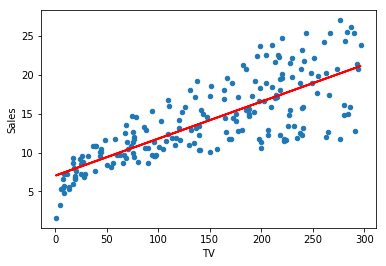

In [106]:
%matplotlib inline
data.plot(kind= 'scatter', x = 'TV', y='Sales')
plt.plot(pd.DataFrame(data['TV']), sales_pred_s, c='r', linewidth = 2)
print ('Los datos azules son los reales, la línea roja es la predicción')

### Modelo predictivo

In [109]:
lm_s.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [110]:
data['sales_pred'] = 7.032594+0.047537 * data['TV']


In [112]:
data['RSE'] = (data['Sales']-data['sales_pred'])**2

In [113]:
SSD_s = sum (data['RSE'])
SSD_s  #Diferencia suma cuadrados

2102.5305838896525

In [114]:
RSE_s = np.sqrt(SSD_s/(len(data)-2))
RSE_s # Desviación típica de los residuos

3.258656369238098

In [115]:
# Promedio de ventas
sales_m_s = np.mean(data['Sales'])
sales_m_s

14.022500000000003

In [148]:
#error promedio (Desviación de datos que no explica el modelo)

error_s = RSE_s/sales_m
error_s

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

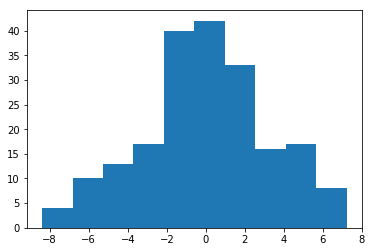

In [117]:
# Distribución de los errores
plt.hist((data['Sales']-data['sales_pred']))

# Regresión lineal múltiple
#### El paquete stats model para regresión múltiple
 * Sales ~ TV
 * Sales ~ Newspaper
 * Sales ~ TV + Newspaper
 * Sales ~ TV + Radio
 * Sales ~ Newspaper + Radio
 * Sales ~ TV + Newspaper + Radio

In [118]:
# Añadir el newspaper al modelo existente

lm1 = smf.ols(formula = 'Sales~TV+Newspaper', data = data).fit()


In [119]:
lm1.params
#Ecuación del modelo

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [120]:
lm1.pvalues
#No son nulos, porque ninguno da cero, el modelo se ve robusto

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

* Sales = 5.774948 + (0.046901 * TV9)0 + (0.044219 * Newspaper)

In [121]:
#R2 
lm1.rsquared

0.6458354938293271

In [122]:
#R2 ajustado 
lm1.rsquared_adj
#[Mejora]

0.6422399150864777

In [166]:
#Proceso de predicción
sales_predm1 = lm1.predict(data[['TV', 'Newspaper']])

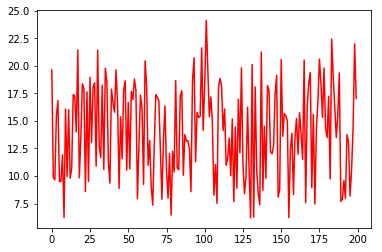

In [167]:
# Verificar la predicción
sales_predm1.plot(kind = 'line', color = 'r')

In [126]:
#Suma de los cuadrados de las diferencias
SSDm1 =sum ((data['Sales']-sales_pred1)**2)
SSDm1

1918.561811896827

In [127]:
#Desviación típica de los residuos
RSEm1 = np.sqrt(SSDm1/(len(data)-3)) #Número de variables predictoras menos 1, por eso se resta el 3
RSEm1

3.120719860252885

In [128]:
#Cálculo del error  
errorm1 = RSEm1 / sales_m
errorm1  #El 18 % de los datos no los explica este modelo (mejora vs el anterior)

0.22255089037282116

In [129]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           3.95e-45
Time:                        20:05:44   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           3.95e-45
Time:                        20:05:49   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusión:
   * Agregar el periódico al modelo de regresión, ajusta poco al modelo

# Agregando la variable "Radio" al modelo

In [131]:
lm2 = smf.ols(formula = 'Sales~TV+Radio', data = data).fit()
lm2.summary()

#El coeficiente del Radio es el más grande que hemos obtenido en las 3 regresiones
# R2 mejora considerablemente
# El estadístico F (F-statístics) disminuye muchísimo, lo cual es muy bueno

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           4.83e-98
Time:                        20:06:00   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
# Hacer la predicción
sales_predm2 = lm2.predict(data[['TV', 'Radio']])

In [139]:

#Suma de los cuadrados de las diferencias
SSDm2 =sum ((data['Sales']-sales_predm2)**2)

#Desviación típica de los residuos
RSEm2 = np.sqrt(SSDm2/(len(data)-3))  #Número de variables predictoras menos 1, por eso se resta el 3

#Cálculo del error  
errorm2 = RSEm2 / sales_m


### 3a regresión, agregando todas las variables

In [179]:
lm3 = smf.ols(formula = 'Sales~TV+Radio+Newspaper', data = data).fit()
sales_predm3 = lm3.predict(data[['TV','Radio','Newspaper']])
#Suma de los cuadrados de las diferencias
SSDm3 =sum ((data['Sales']-sales_predm3)**2)

#Desviación típica de los residuos
RSEm3 = np.sqrt(SSDm3/(len(data)-3))  #Número de variables predictoras menos 1, por eso se resta el 3

#Cálculo del error  
errorm3 = RSEm3 / sales_m                                 

Suma de los cuadrados de las diferencias (el menor es mejor) :

 Reg simple [TV] SSD: 2102.5305838896525 
 Reg mult[TV-NewsPaper] SSD 1918.561811896827 
 Reg mult [TV+Radio] SSD 556.9139800676182 
 Reg mult [TV+Radio+Newsp] SSD 556.8252629021874

Desviación típica de los residuos(el menor es mejor)) :

 Reg simple [TV] RSE: 3.258656369238098 
 Reg mult[TV-NewsPaper] RSE 3.120719860252885 
 Reg mult [TV+Radio] RSE 1.681360912508001 
 Reg mult [TV+Radio+Newsp] RSE 1.6812269856174875

Cálculo del error [% datos que no explica el modelo, el menor es mejor] :

 Reg simple [TV] Error: 0.2323876890168014 
 Reg mult[TV-NewsPaper] Error 0.22255089037282116 
 Reg mult [TV+Radio] Error 0.11990450436855059 
 Reg mult [TV+Radio+Newsp] Error 0.11989495351167674



-------------------------------------------------------------------------------
MATRIZ DE CORRELACIÓN
                  TV     Radio  Newspaper     Sales  sales_pred       RSE
TV          1.000000  0.054809   0.056648  0.782224    1.000000

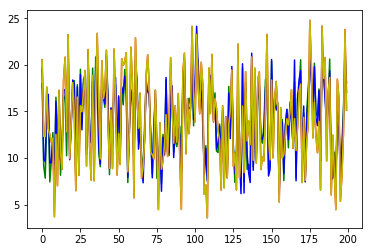

In [193]:
# Comparación de resultados [suma de los errores]
print('Suma de los cuadrados de las diferencias (el menor es mejor) :')
print('\n','Reg simple [TV] SSD:',SSD_s,
      '\n','Reg mult[TV-NewsPaper] SSD', SSDm1,
      '\n','Reg mult [TV+Radio] SSD', SSDm2, 
      '\n','Reg mult [TV+Radio+Newsp] SSD', SSDm3, 
       end = '\n\n')

print('Desviación típica de los residuos(el menor es mejor)) :')
print('\n','Reg simple [TV] RSE:',RSE_s,
      '\n', 'Reg mult[TV-NewsPaper] RSE', RSEm1,
      '\n','Reg mult [TV+Radio] RSE', RSEm2, 
      '\n','Reg mult [TV+Radio+Newsp] RSE', RSEm3, 
      end = '\n\n')

print('Cálculo del error [% datos que no explica el modelo, el menor es mejor] :')
print('\n','Reg simple [TV] Error:',error_s,
      '\n', 'Reg mult[TV-NewsPaper] Error', errorm1,
      '\n','Reg mult [TV+Radio] Error', errorm2,
      '\n','Reg mult [TV+Radio+Newsp] Error', errorm3,
      end = '\n\n')

print ('\n')
print('-------------------------------------------------------------------------------')

print ('MATRIZ DE CORRELACIÓN')
# print(plt.matshow(data.corr()))
print(data.corr())
print ('\n')
print('-------------------------------------------------------------------------------')

print ('GRÁFICO DE PREDICCIONES')
print (sales_pred_s.plot(kind = 'line', color = 'g'), end = '\n') #Regresión lineal simple
print (sales_predm1.plot(kind = 'line', color = 'b'), end = '\n') #Múltiple1
print (sales_predm2.plot(kind = 'line', color = 'r'), end = '\n') #Múltiple2
print (sales_predm3.plot(kind = 'line', color = 'y'), end = '\n') #Múltiple3


In [174]:

print('REGRESIÓN LÍNEAL SIMPLE', lm_s.summary(),'\n', 
      'REG MÚLTIPLE 1', lm1.summary(),'\n',  
      'REG MÚLTIPLE 2', lm2.summary(),'\n',
      'REG MÚLTIPLE 3', lm3.summary() ) 

REGRESIÓN LÍNEAL SIMPLE                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        20:33:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0

### Conclusión
##### Agregar todas las variables al modelo, afecta los resultados.
##### El modelo que mejor ajusta es TV + Radio

# Multicolinealidad

* Se refiere a la correlación que existe entre variables X (explicativas)

#### En nuestro caso, nos da problemas Newspaper ~ TV + Radio  ---> R^2 VIF = 1/(1-R^2)

#### El factor de inflación de la varianza
* Si VIF = 1: Las variables no están correlacionadas
* Si VIF < 5: Las variables tienen correlación moderada y pueden quedarse en el modelo
* Si VIF > 5: Las variables están correlacionadas y deben desaparecer del modelo

In [195]:
#Newspaper ~ TV + Radio  ---> R^2 VIF = 1/(1-R^2)

lm_n1 = smf.ols(formula = 'Newspaper~TV+Radio', data= data).fit()
rsquared_n1 = lm_n1.rsquared
VIF1 = 1/(1-rsquared_n1)
VIF1

1.1451873787239288

In [197]:
#TV ~ Newspaper + Radio  ---> R^2 VIF = 1/(1-R^2)
lm_n2 = smf.ols(formula = 'TV~Newspaper+Radio', data= data).fit()
rsquared_n2 = lm_n2.rsquared
VIF2 = 1/(1-rsquared_n2)
VIF2

1.0046107849396502

In [198]:
#Radio ~ TV + Newspaper  ---> R^2 VIF = 1/(1-R^2)
lm_n3 = smf.ols(formula = 'Radio~TV+Newspaper', data= data).fit()
rsquared_n3 = lm_n3.rsquared
VIF3 = 1/(1-rsquared_n3)
VIF3

1.1449519171055353

* EL VIF de radio y periódico es casi el mismo, por eso, tienen alta correlación.

# Con base en los resultados obtenidos, el mejor modelo es el siguiente:

In [199]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           4.83e-98
Time:                        20:57:06   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""